# Data cleaning and wrangling
The cleaning process was performed by checking the distribution for numerical features and the frequency for categorical ones, and verifying the null content for every column. We will use the divide and conquer strategy treating the variables by sub-groups. For each group, some actions and recommendations will be made.

In [1]:
import re, unidecode, random
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# ESTU variables cleaning
 The ESTU variables (regarding student) will be cleaning using a sub-group separation approach.

In [2]:
df_clean = pd.read_csv('./saberpro_2016-2019_cleaned.csv')
print(df_clean.shape)
df_clean.head()

/home/wilomaku/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,10,12,13,14,15,17,18,32,33,34,47,50,51,52,54,58,59,96,97,100,101,102,103,104,105,106,107,108,113,114,115,124) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(963255, 133)


,Unnamed: 0,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,APLI_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,...,ESTU_DISC_SORDOCEGUERA,ESTU_DISC_PSICOSOCIAL,ESTU_DISC_ASPERGER,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PNBC,PERCENTIL_NBC,percentile
0,0,CC,1 COLOMBIA,F,24/11/1994,NO,20163,EK201630197609,ESTUDIANTE,CUNDINAMARCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
1,1,CC,1 COLOMBIA,M,11/06/1991,NO,20163,EK201630241417,ESTUDIANTE,BOGOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92
2,2,CC,1 COLOMBIA,F,22/02/1995,NO,20163,EK201630080363,ESTUDIANTE,NORTE SANTANDER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43
3,3,CC,1 COLOMBIA,M,01/08/1994,NO,20163,EK201630081694,ESTUDIANTE,BOGOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84
4,4,CC,1 COLOMBIA,M,18/08/1980,NO,20163,EK201630079620,ESTUDIANTE,BOLIVAR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76


In [3]:
list(df_clean.columns)

['Unnamed: 0',
 'ESTU_TIPODOCUMENTO',
 'ESTU_NACIONALIDAD',
 'ESTU_GENERO',
 'ESTU_FECHANACIMIENTO',
 'ESTU_EXTERIOR',
 'PERIODO',
 'APLI_CONSECUTIVO',
 'ESTU_ESTUDIANTE',
 'ESTU_DEPTO_RESIDE',
 'ESTU_COD_RESIDE_DEPTO',
 'ESTU_MCPIO_RESIDE',
 'ESTU_COD_RESIDE_MCPIO',
 'ESTU_AREARESIDE',
 'ESTU_ESTADOCIVIL',
 'ESTU_COLE_TERMINO',
 'ESTU_OTROCOLE_TERMINO',
 'ESTU_TITULOOBTENIDOBACHILLER',
 'ESTU_PORCENTAJECREDITOSAPROB',
 'ESTU_VALORMATRICULAUNIVERSIDAD',
 'ESTU_PAGOMATRICULABECA',
 'ESTU_PAGOMATRICULACREDITO',
 'ESTU_PAGOMATRICULAPADRES',
 'ESTU_PAGOMATRICULAPROPIO',
 'ESTU_COMOCAPACITOEXAMENSB11',
 'ESTU_CURSODOCENTESIES',
 'ESTU_CURSOIESAPOYOEXTERNO',
 'ESTU_CURSOIESEXTERNA',
 'ESTU_SIMULACROTIPOICFES',
 'ESTU_ACTIVIDADREFUERZOAREAS',
 'ESTU_ACTIVIDADREFUERZOGENERIC',
 'ESTU_TIPODOCUMENTOSB11',
 'ESTU_SEMESTRECURSA',
 'FAMI_HOGARACTUAL',
 'FAMI_CABEZAFAMILIA',
 'FAMI_NUMPERSONASACARGO',
 'FAMI_EDUCACIONPADRE',
 'FAMI_EDUCACIONMADRE',
 'FAMI_TRABAJOLABORPADRE',
 'FAMI_TRABAJOLABORMADRE

## VARIABLES DISCAPACIDADES

In [4]:
df_clean.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df_clean['ESTU_DISC_COM'] = np.NaN
df_clean.loc[(df_clean['ESTU_DISC_AUDITCASTELL'].notnull()) | (df_clean['ESTU_DISC_AUDITLSC'].notnull()) | 
             (df_clean['ESTU_DISC_VISUALCEGUE'].notnull()) | (df_clean['ESTU_DISC_VISUALBAJA'].notnull()) | 
             (df_clean['ESTU_DISC_SORDOCEGUERA'].notnull()) | (df_clean['ESTU_DISC_VOZHABLA'].notnull()),
             'ESTU_DISC_COM'] = 'x'

df_clean = df_clean.drop(['ESTU_DISC_AUDITCASTELL','ESTU_DISC_AUDITLSC','ESTU_DISC_VISUALCEGUE','ESTU_DISC_VISUALBAJA','ESTU_DISC_SORDOCEGUERA','ESTU_DISC_VOZHABLA'],axis=1)

In [6]:
cols_disc = [col for col in df_clean.columns if 'DISC' in col]
df_clean['ESTU_DISC'] = np.NaN

for col in cols_disc:
    df_clean.loc[df_clean[col].notnull(),'ESTU_DISC'] = col.split('_')[-1]
    
df_clean = df_clean.drop(cols_disc,axis=1)

df_clean['ESTU_DISC'].value_counts(dropna=False)

NaN            962941
FISICA            312
PSICOSOCIAL         2
Name: ESTU_DISC, dtype: int64

!Drop ESTU_DISC is recommended

## VARIABLES ETNIA

In [7]:
df_bk = df_clean.copy()
#df_clean = df_bk.copy()

In [8]:
def fix_etnia(df,col):
    df.loc[df[col]=='-',col] = 'Ninguno'
    df.loc[df[col]=='Comunidad afrodescendiente',col] = 'Afrodescendiente'
    df.loc[(df[col]=='Otro grupo étnico minoritario') | (df[col]=='Comunidades Rom (Gitanas)') | (df[col]=='Cubeo'),col] = 'Otro'
    return df

df_clean = fix_etnia(df_clean,'ESTU_ETNIA')
df_clean.drop(['ESTU_TIENEETNIA',],axis=1,inplace=True)
df_clean['ESTU_ETNIA'].value_counts(dropna=False)

NaN                 733684
Ninguno             221616
Afrodescendiente      4324
Otro                   980
Zenú                   721
Wayúu                  513
Pasto                  407
Raizal                 220
Paez                   212
Emberá                 160
Pijao                  147
Inga                    99
Cancuamo                52
Guambiano               42
Palenquero              22
Huitoto                 17
Arhuaco                 16
Sikuani                 14
Tucano                   9
Name: ESTU_ETNIA, dtype: int64

!ESTU_ETNIA only available for 2018.

## VARIABLES NSE (Nivel socioeconómico)

In [9]:
df_bk = df_clean.copy()
#df_clean = df_bk.copy()

In [10]:
dic_NSE = {'NSE1':1.0,'NSE2':2.0,'NSE3':3.0,'NSE4':4.0}
def fix_NSE(df,col):
    for key in dic_NSE:
        df.loc[df[col]==key,col] = dic_NSE[key]
    return df

def fix_faltante(df,col):
    df.loc[df[col]=='.',col] = np.NaN
    df.loc[df[col]=='-',col] = np.NaN
    df[col] = df[col].astype(float)
    return df

df_clean = fix_NSE(df_clean,'ESTU_NSE_INDIVIDUAL')
df_clean = fix_faltante(df_clean,'ESTU_NSE_INDIVIDUAL')
df_clean['ESTU_NSE_INDIVIDUAL'] = pd.Categorical(df_clean['ESTU_NSE_INDIVIDUAL'],ordered=True,categories=[1.0,2.0,3.0,4.0])

df_clean = fix_faltante(df_clean,'ESTU_INSE_INDIVIDUAL')

df_clean['ESTU_NSE_IES'] = pd.Categorical(df_clean['ESTU_NSE_IES'],ordered=True,categories=[1.0,2.0,3.0,4.0])

df_clean.groupby(['YEAR','ESTU_NSE_INDIVIDUAL',]).agg({'ESTU_INSE_INDIVIDUAL':'mean',})

ESTU_INSE_INDIVIDUAL
YEAR ESTU_NSE_INDIVIDUAL                      
2016 1.0                             37.271701
     2.0                             45.642486
     3.0                             53.910265
     4.0                             65.286278
2017 1.0                             39.810600
     2.0                             50.276676
     3.0                             57.100883
     4.0                             65.613908
2018 1.0                             39.823619
     2.0                             50.267076
     3.0                             57.098961
     4.0                             65.617540
2019 1.0                             41.162244
     2.0                             50.899323
     3.0                             57.173022
     4.0                             68.312694

!'ESTU_NSE_IES' has not values for 2016.

## VARIABLES LOCALIZACIÓN

In [11]:
df_bk = df_clean.copy()
#df_clean = df_bk.copy()

In [12]:
def fix_faltante_string(df,col):
    df.loc[df[col]=='.',col] = np.NaN
    df.loc[df[col]=='-',col] = np.NaN
    return df

cols_geo = ['ESTU_PRGM_CODMUNICIPIO','ESTU_PRGM_MUNICIPIO','ESTU_PRGM_DEPARTAMENTO','ESTU_INST_CODMUNICIPIO',
            'ESTU_INST_MUNICIPIO','ESTU_INST_DEPARTAMENTO','ESTU_DEPTO_RESIDE','ESTU_COD_RESIDE_DEPTO',
            'ESTU_MCPIO_RESIDE','ESTU_COD_RESIDE_MCPIO','ESTU_AREARESIDE',]

for col in cols_geo:
    df_clean = fix_faltante_string(df_clean,col)

/home/wilomaku/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


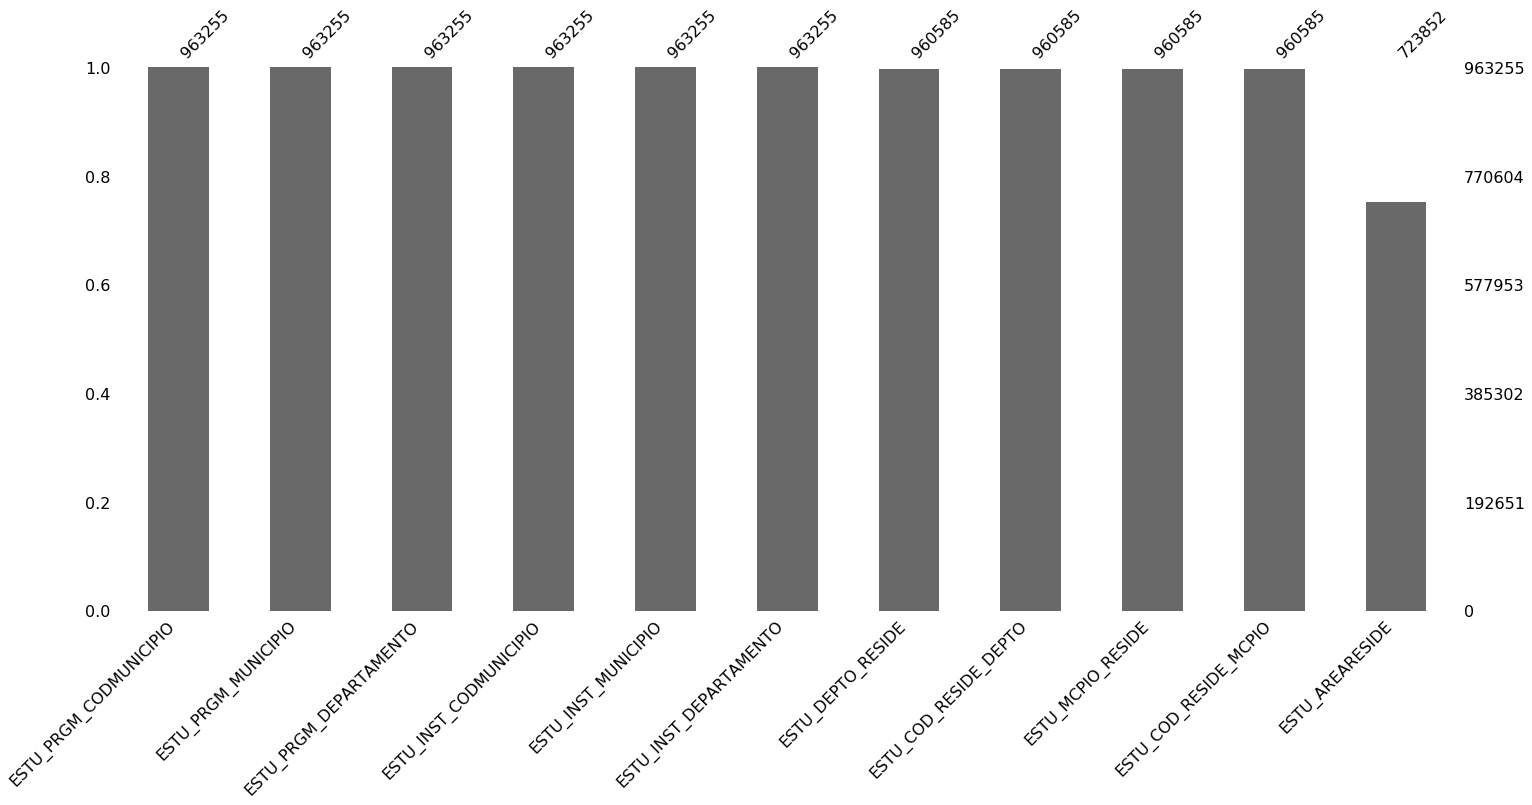

In [13]:
msno.bar(df_clean[cols_geo])

In [14]:
(df_clean.loc[df_clean['ESTU_DEPTO_RESIDE'].notnull(),'ESTU_DEPTO_RESIDE'] == df_clean.loc[df_clean['ESTU_DEPTO_RESIDE'].notnull(),'ESTU_PRGM_DEPARTAMENTO']).value_counts()

True     787242
False    173343
dtype: int64

In [15]:
df_clean.loc[df_clean['ESTU_DEPTO_RESIDE'].isnull(),'ESTU_DEPTO_RESIDE'] = df_clean.loc[df_clean['ESTU_DEPTO_RESIDE'].isnull(),'ESTU_PRGM_DEPARTAMENTO']
#df_clean.loc[df_clean['ESTU_COD_RESIDE_DEPTO'].insnull(),'ESTU_COD_RESIDE_DEPTO'] = df_clean['ESTU_PRGM_DEPARTAMENTO']
df_clean.loc[df_clean['ESTU_MCPIO_RESIDE'].isnull(),'ESTU_MCPIO_RESIDE'] = df_clean.loc[df_clean['ESTU_MCPIO_RESIDE'].isnull(),'ESTU_PRGM_MUNICIPIO']
#df_clean.loc[df_clean[,'ESTU_COD_RESIDE_MCPIO'].insnull(),'ESTU_COD_RESIDE_MCPIO'] = df_clean['ESTU_PRGM_CODMUNICIPIO']

!ESTU_AREARESIDE under study

!ESTU_COD_RESIDE_DEPTO and ESTU_COD_RESIDE_MCPIO need to be verified using the dictionary

## VARIABLES PRESENTACIÓN

In [16]:
df_bk = df_clean.copy()
#df_clean = df_bk.copy()

/home/wilomaku/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


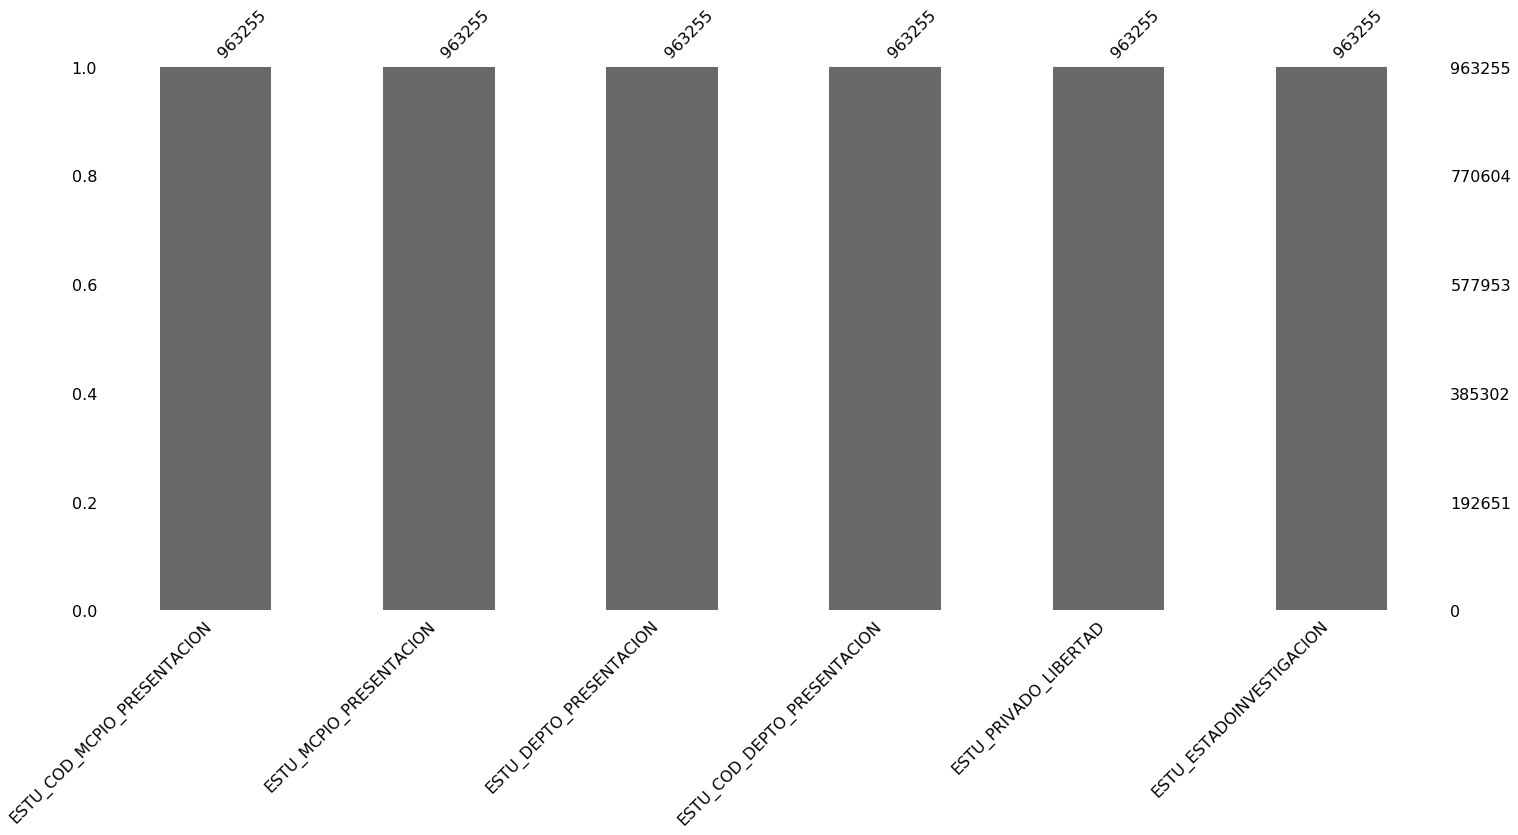

In [17]:
cols_pres = [col for col in df_clean.columns if 'PRESENTACION' in col] + ['ESTU_PRIVADO_LIBERTAD','ESTU_ESTADOINVESTIGACION']
for col in cols_pres:
    df_clean = fix_faltante_string(df_clean,col)

msno.bar(df_clean[cols_pres])

In [18]:
print(df_clean['ESTU_PRIVADO_LIBERTAD'].value_counts(dropna=False))
print(df_clean['ESTU_ESTADOINVESTIGACION'].value_counts(dropna=False))

N    963225
S        30
Name: ESTU_PRIVADO_LIBERTAD, dtype: int64
PUBLICAR                                  959249
VALIDEZ OFICINA JURÍDICA                    2616
PRESENTE CON LECTURA TARDIA                 1254
NO SE COMPROBO IDENTIDAD DEL EXAMINADO       136
Name: ESTU_ESTADOINVESTIGACION, dtype: int64


## VARIABLES ACADÊMICAS

In [19]:
df_bk = df_clean.copy()
#df_clean = df_bk.copy()

/home/wilomaku/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


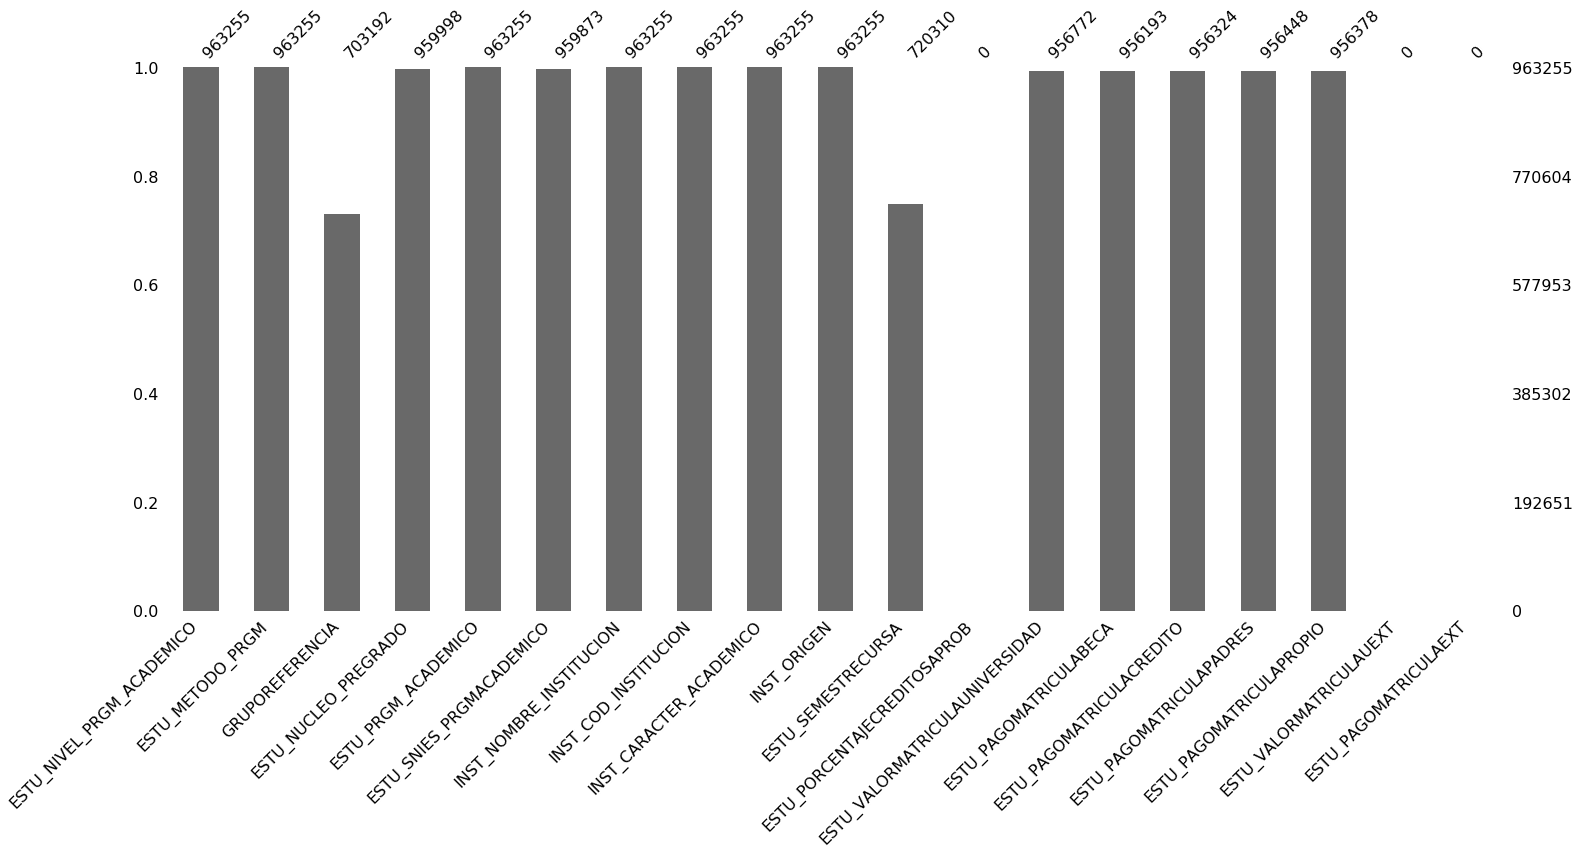

In [20]:
cols_progra = ['ESTU_NIVEL_PRGM_ACADEMICO','ESTU_METODO_PRGM','GRUPOREFERENCIA','ESTU_NUCLEO_PREGRADO',
               'ESTU_PRGM_ACADEMICO','ESTU_SNIES_PRGMACADEMICO','INST_NOMBRE_INSTITUCION',
               'INST_COD_INSTITUCION','INST_CARACTER_ACADEMICO','INST_ORIGEN',
               'ESTU_SEMESTRECURSA','ESTU_PORCENTAJECREDITOSAPROB','ESTU_VALORMATRICULAUNIVERSIDAD',
               'ESTU_PAGOMATRICULABECA','ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULAPADRES',
               'ESTU_PAGOMATRICULAPROPIO','ESTU_VALORMATRICULAUEXT','ESTU_PAGOMATRICULAEXT',]

for col in cols_progra:
    df_clean = fix_faltante_string(df_clean,col)
    
msno.bar(df_clean[cols_progra])

In [21]:
#ESTU_SNIES_PRGMACADEMICO innecesaria por provenir de INST_NOMBRE_INSTITUCION + ESTU_PRGM_ACADEMICO
#Columnas sin información 'ESTU_PORCENTAJECREDITOSAPROB','ESTU_VALORMATRICULAUEXT','ESTU_PAGOMATRICULAEXT'
df_clean.drop(['ESTU_SNIES_PRGMACADEMICO','ESTU_PORCENTAJECREDITOSAPROB',
               'ESTU_VALORMATRICULAUEXT','ESTU_PAGOMATRICULAEXT'],axis=1,inplace=True)

In [22]:
#Usando ESTU_PRGM_ACADEMICO para obtener ESTU_NUCLEO_PREGRADO
df_prog = df_clean[['ESTU_PRGM_ACADEMICO','ESTU_NUCLEO_PREGRADO']].copy()
df_prog = df_prog.loc[df_prog['ESTU_NUCLEO_PREGRADO'].notnull()]
df_prog.drop_duplicates(inplace=True)

df_prog['pregrado_unique'] = df_prog['ESTU_PRGM_ACADEMICO'].apply(lambda x: df_prog.loc[(df_prog['ESTU_NUCLEO_PREGRADO'].notnull()) & (df_prog['ESTU_PRGM_ACADEMICO']==x),'ESTU_NUCLEO_PREGRADO'].unique())
df_prog['pregrado_unique'] = df_prog['pregrado_unique'].apply(lambda x: x[0])
dict_map = pd.Series(df_prog.pregrado_unique.values,index=df_prog.ESTU_PRGM_ACADEMICO).to_dict()

#Adicionando um programa acadêmico que no aparece en los valores no nulos
dict_map['ADMINISTRACIÓN MARITIMA Y PORTUARIA'] = '9 ADMINISTRACION'

In [23]:
def func_apply_dic(val_cols):
    try:
        return dict_map[val_cols]
    except:
        return np.NaN

filt = df_clean['ESTU_NUCLEO_PREGRADO'].isnull()
df_clean.loc[filt,'ESTU_NUCLEO_PREGRADO'] = df_clean.loc[filt,'ESTU_PRGM_ACADEMICO'].apply(func_apply_dic)

In [24]:
pattern = r"[\d]"
df_clean.loc[df_clean['GRUPOREFERENCIA'].notnull(),'GRUPOREFERENCIA'] = df_clean.loc[df_clean['GRUPOREFERENCIA'].notnull(),'GRUPOREFERENCIA'].apply(lambda x: unidecode.unidecode(re.sub(pattern,'',x)).strip())

df_clean['GRUPOREFERENCIA'].unique()

array(['ADMINISTRACION Y AFINES', 'PSICOLOGIA', 'ENFERMERIA',
       'INGENIERIA', 'EDUCACION', 'ARQUITECTURA Y URBANISMO',
       'COMUNICACION, PERIODISMO Y PUBLICIDAD', 'BELLAS ARTES Y DISENO',
       'CIENCIAS NATURALES Y EXACTAS', 'SALUD', 'CONTADURIA Y AFINES',
       'MEDICINA', 'DERECHO', 'CIENCIAS AGROPECUARIAS',
       'CIENCIAS SOCIALES', 'NORMALES SUPERIORES',
       'CIENCIAS MILITARES Y NAVALES',
       'TECNOLOGICO EN ADMINISTRACION Y TURISMO', 'ECONOMIA',
       'HUMANIDADES', 'RECREACION Y DEPORTES', nan], dtype=object)

In [25]:
#Usando ESTU_NUCLEO_PREGRADO para obtener GRUPOREFERENCIA
df_prog = df_clean[['ESTU_NUCLEO_PREGRADO','GRUPOREFERENCIA']].copy()
df_prog = df_prog.loc[df_prog['GRUPOREFERENCIA'].notnull()]
df_prog.drop_duplicates(inplace=True)

df_prog['grupo_unique'] = df_prog['ESTU_NUCLEO_PREGRADO'].apply(lambda x: df_prog.loc[(df_prog['GRUPOREFERENCIA'].notnull()) & (df_prog['ESTU_NUCLEO_PREGRADO']==x),'GRUPOREFERENCIA'].unique())
df_prog['grupo_unique'] = df_prog['grupo_unique'].apply(lambda x: x[0])
dict_map = pd.Series(df_prog.grupo_unique.values,index=df_prog.ESTU_NUCLEO_PREGRADO).to_dict()

In [26]:
def func_apply_dic(val_cols):
    try:
        return dict_map[val_cols]
    except:
        return np.NaN

filt = df_clean['GRUPOREFERENCIA'].isnull()
df_clean.loc[filt,'GRUPOREFERENCIA'] = df_clean.loc[filt,'ESTU_NUCLEO_PREGRADO'].apply(func_apply_dic)

In [27]:
#Usando INST_NOMBRE_INSTITUCION y ESTU_PRGM_ACADEMICO para obtener ESTU_VALORMATRICULAUNIVERSIDAD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

filter_inst = df_clean['ESTU_VALORMATRICULAUNIVERSIDAD'].notnull()

le1 = LabelEncoder()
le2 = LabelEncoder()

X = np.stack([le1.fit_transform(df_clean.loc[filter_inst,'INST_NOMBRE_INSTITUCION']),
               le2.fit_transform(df_clean.loc[filter_inst,'ESTU_PRGM_ACADEMICO'])]).T

Y = df_clean.loc[filter_inst,'ESTU_VALORMATRICULAUNIVERSIDAD']

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [28]:
filter_inst = df_clean['ESTU_VALORMATRICULAUNIVERSIDAD'].isnull()

def func_apply_knn(val_cols):
    try:
        ini = le1.transform([val_cols[0]])[0]
        epa = le2.transform([val_cols[1]])[0]
        return knn.predict([[ ini, epa]])[0]
    except:
        return df_clean['ESTU_VALORMATRICULAUNIVERSIDAD'].mode()

df_clean.loc[filter_inst,'ESTU_VALORMATRICULAUNIVERSIDAD'] = df_clean.loc[filter_inst,['INST_NOMBRE_INSTITUCION','ESTU_PRGM_ACADEMICO']].apply(func_apply_knn, axis=1)

In [29]:
cols_PAGOMATRICULA = ['ESTU_PAGOMATRICULABECA','ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULAPADRES',
                      'ESTU_PAGOMATRICULAPROPIO']

def func_apply_matricula(val_cols):
    concat_val_cols = ''.join(val_cols)
    n_nan_cols = concat_val_cols.count('nul')
    if n_nan_cols == 4:
        ret = np.NaN
    elif val_cols[0] == 'Si':
        ret = 'BECA'
    elif val_cols[1] == 'Si':
        ret = 'CREDITO'
    elif val_cols[2] == 'Si':
        ret = 'PADRES'
    elif val_cols[3] == 'Si':
        ret = 'PROPIO'
    else:
        ret = 'OTRO'
    return ret

df_clean['PAGOMATRICULA'] = df_clean[cols_PAGOMATRICULA].fillna('nul').apply(lambda x: func_apply_matricula(x),axis=1)
df_clean['PAGOMATRICULA'].value_counts(dropna=False)

PADRES     334204
CREDITO    266821
PROPIO     199947
BECA       151835
NaN          6490
OTRO         3958
Name: PAGOMATRICULA, dtype: int64

In [30]:
df_clean.loc[df_clean['ESTU_VALORMATRICULAUNIVERSIDAD']=="['Entre 1 millón y menos de 2.5 millones']",
             'ESTU_VALORMATRICULAUNIVERSIDAD'] = 'Entre 1 millón y menos de 2.5 millones'

df_clean.loc[df_clean['ESTU_VALORMATRICULAUNIVERSIDAD']=='Más de 7 millones',
             'ESTU_VALORMATRICULAUNIVERSIDAD'] = 'Mas de 7 millones'

df_clean.loc[df_clean['PAGOMATRICULA'].isnull(),'ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts(dropna=False)

Entre 2.5 millones y menos de 4 millones    1443
Entre 1 millón y menos de 2.5 millones      1373
Mas de 7 millones                           1189
Entre 4 millones y menos de 5.5 millones     791
Entre 500 mil y menos de 1 millón            628
Menos de 500 mil                             627
Entre 5.5 millones y menos de 7 millones     378
No pagó matrícula                             50
[Entre 1 millón y menos de 2.5 millones]      11
Name: ESTU_VALORMATRICULAUNIVERSIDAD, dtype: int64

In [31]:
#Columnas consolidadas en PAGOMATRICULA y por tanto innecesarias.
df_clean.drop(cols_PAGOMATRICULA,axis=1,inplace=True)

In [32]:
df_clean.loc[df_clean['ESTU_SEMESTRECURSA']=='12 o más','ESTU_SEMESTRECURSA'] = 12
df_clean['ESTU_SEMESTRECURSA'] = pd.to_numeric(df_clean['ESTU_SEMESTRECURSA'], errors='coerce', downcast='integer')

df_clean['ESTU_SEMESTRECURSA'] = pd.Categorical(df_clean['ESTU_SEMESTRECURSA'],ordered=True,
                                                categories=[1.0,2.0,3.0,4.0,5.0,6.0,
                                                            7.0,8.0,9.0,10.0,11.0,12.0])

df_clean['ESTU_SEMESTRECURSA'].value_counts(dropna=False)

NaN     242945
9.0     241817
10.0    239293
8.0     141762
7.0      40606
11.0     27825
12.0     16253
6.0       5574
4.0       3580
5.0       2342
3.0        799
2.0        324
1.0        135
Name: ESTU_SEMESTRECURSA, dtype: int64

!ESTU_SEMESTRECURSA has 20% of null values

!PAGOMATRICULA has 0.7% of null values

## VARIABLES COLEGIO TERMINO

In [33]:
df_bk = df_clean.copy()
#df_clean = df_bk.copy()

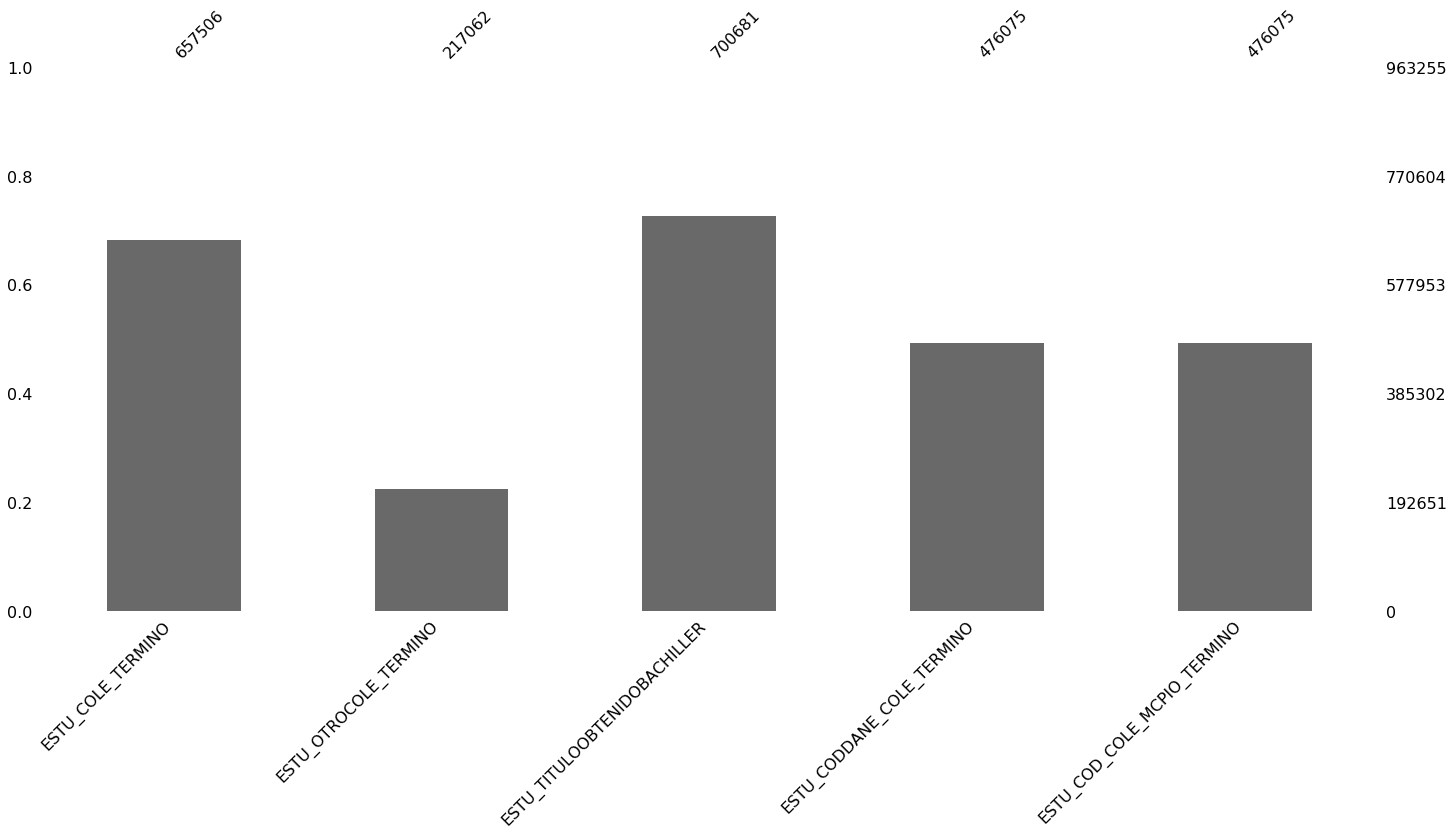

In [34]:
cols_termino = ['ESTU_COLE_TERMINO','ESTU_OTROCOLE_TERMINO','ESTU_TITULOOBTENIDOBACHILLER',
                'ESTU_CODDANE_COLE_TERMINO','ESTU_COD_COLE_MCPIO_TERMINO',]

for col in cols_termino:
    df_clean = fix_faltante_string(df_clean,col)
    
msno.bar(df_clean[cols_termino])

In [35]:
df_clean[cols_termino].tail()

,ESTU_COLE_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO
963250,507,NaN,NaN,1.17001e+11,17001
963251,568,NaN,NaN,1.08758e+11,8758
963252,18133,NaN,NaN,1.68432e+11,68432
963253,6997,NaN,NaN,1.11001e+11,11001
963254,18181,NaN,NaN,1.50001e+11,50001


In [36]:
df_clean.loc[df_clean['ESTU_TITULOOBTENIDOBACHILLER'].isnull(),'YEAR'].unique()

array([2016, 2017, 2018, 2019])

!The columns of this sub group can be filled between them: high college, codes and obtained title

## VARIABLES REFUERZO

In [37]:
df_bk = df_clean.copy()
#df_clean = df_bk.copy()

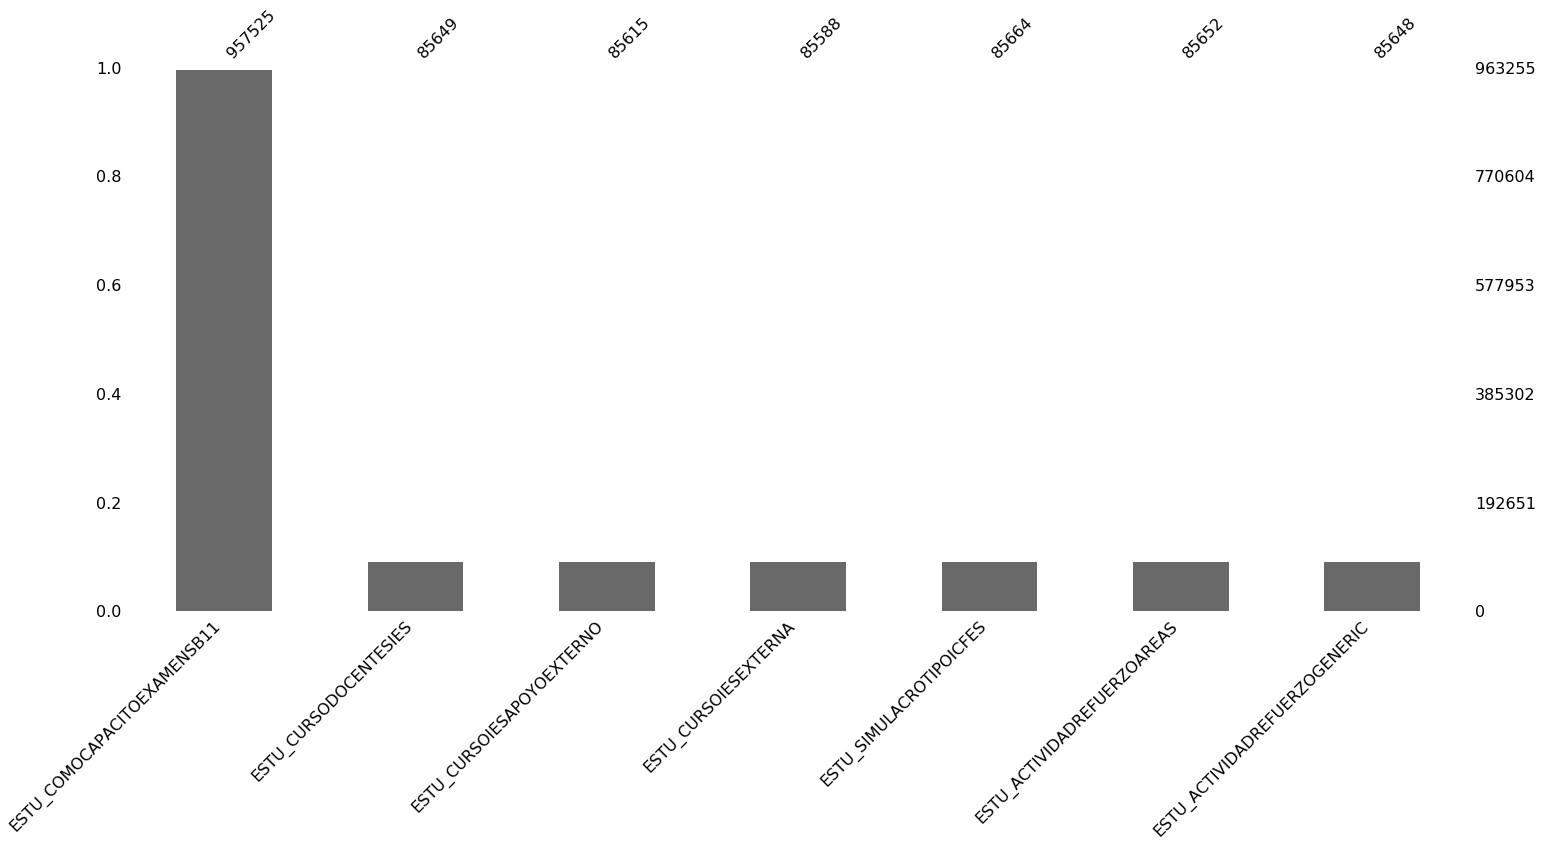

In [38]:
cols_refuerzo = ['ESTU_COMOCAPACITOEXAMENSB11','ESTU_CURSODOCENTESIES','ESTU_CURSOIESAPOYOEXTERNO',
                 'ESTU_CURSOIESEXTERNA','ESTU_SIMULACROTIPOICFES','ESTU_ACTIVIDADREFUERZOAREAS',
                 'ESTU_ACTIVIDADREFUERZOGENERIC',]

for col in cols_refuerzo:
    df_clean = fix_faltante_string(df_clean,col)
    
msno.bar(df_clean[cols_refuerzo])

In [39]:
for col in cols_refuerzo:
    print(df_clean[col].value_counts(dropna=False))
    print("---------------------------------------------------------------------")

Repasó por cuenta propia                    653212
No realizó ninguna prueba de preparación    215494
Tomó un curso de preparación                 88819
NaN                                           5730
Name: ESTU_COMOCAPACITOEXAMENSB11, dtype: int64
---------------------------------------------------------------------
NaN                    877606
Menos de 20 horas       32644
Entre 20 y 30 horas     30462
Más de 30 horas         22543
Name: ESTU_CURSODOCENTESIES, dtype: int64
---------------------------------------------------------------------
NaN                    877640
Menos de 20 horas       44491
Entre 20 y 30 horas     25507
Más de 30 horas         15617
Name: ESTU_CURSOIESAPOYOEXTERNO, dtype: int64
---------------------------------------------------------------------
NaN                    877667
Menos de 20 horas       54632
Entre 20 y 30 horas     18144
Más de 30 horas         12812
Name: ESTU_CURSOIESEXTERNA, dtype: int64
-------------------------------------------------

!ESTU_COMOCAPACITOEXAMENSB11 can be dropped because the relation with the score is indirect

!ESTU_CURSODOCENTESIES,ESTU_CURSOIESAPOYOEXTERNO,ESTU_CURSOIESEXTERNA,ESTU_SIMULACROTIPOICFES, ESTU_ACTIVIDADREFUERZOAREAS,ESTU_ACTIVIDADREFUERZOGENERIC can be dropped because the null rate is high

## VARIABLES ACTIVIDADES

In [40]:
df_bk = df_clean.copy()
#df_clean = df_bk.copy()

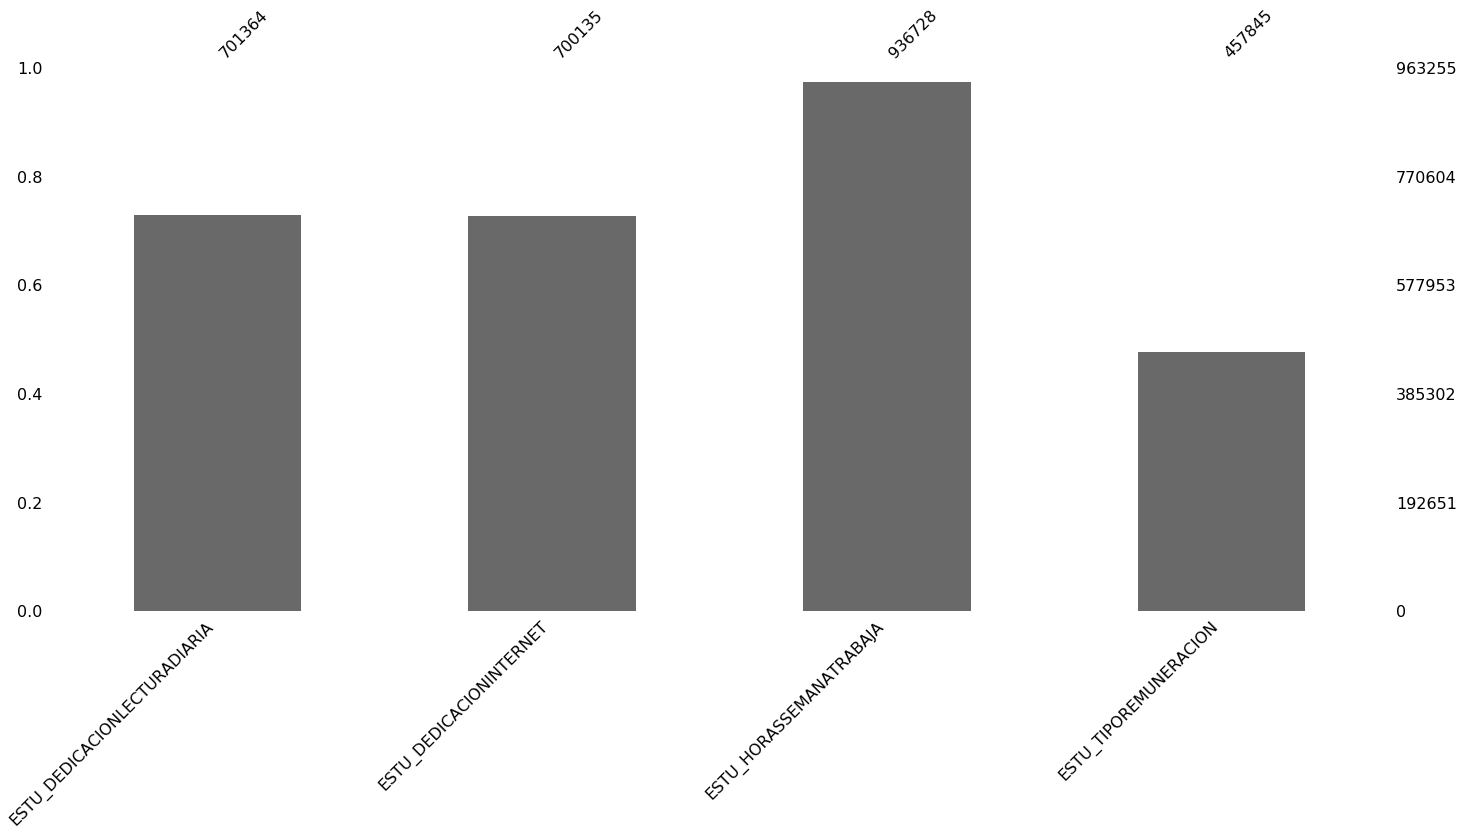

In [41]:
cols_acti = ['ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET','ESTU_HORASSEMANATRABAJA', 'ESTU_TIPOREMUNERACION',]

for col in cols_acti:
    df_clean = fix_faltante_string(df_clean,col)
    
msno.bar(df_clean[cols_acti])

In [42]:
for col in cols_acti:
    print(df_clean[col].value_counts(dropna=False))
    print("---------------------------------------------------------------------")

NaN                           261891
30 minutos o menos            253864
Entre 30 y 60 minutos         251372
Entre 1 y 2 horas              93598
No leo por entretenimiento     69292
Más de 2 horas                 33238
Name: ESTU_DEDICACIONLECTURADIARIA, dtype: int64
---------------------------------------------------------------------
Entre 1 y 3 horas    394420
NaN                  263120
Menos de una hora    177503
Más de 4 horas       128212
Name: ESTU_DEDICACIONINTERNET, dtype: int64
---------------------------------------------------------------------
Más de 30 horas        361594
0                      228535
Entre 11 y 20 horas    127564
Menos de 10 horas      109686
Entre 21 y 30 horas    109349
NaN                     26527
Name: ESTU_HORASSEMANATRABAJA, dtype: int64
---------------------------------------------------------------------
NaN                           505410
Si, en efectivo               350842
No                             93670
Si, en especie              

In [43]:
df_clean.loc[df_clean['ESTU_DEDICACIONINTERNET'].isnull(),'YEAR'].unique()

array([2016, 2017, 2018, 2019])

In [44]:
vals_remuneracion = ['Si, en efectivo','Si, en efectivo y especie','Si, en efectivo y especie ','Si, en especie']
df_clean.loc[df_clean['ESTU_TIPOREMUNERACION'].isin(vals_remuneracion),'ESTU_TIPOREMUNERACION'] = 'Si'

df_clean[['ESTU_HORASSEMANATRABAJA','ESTU_TIPOREMUNERACION','ESTU_TIPODOCUMENTO']].fillna('null').groupby(['ESTU_HORASSEMANATRABAJA','ESTU_TIPOREMUNERACION'])['ESTU_TIPODOCUMENTO'].count()

ESTU_HORASSEMANATRABAJA  ESTU_TIPOREMUNERACION
0                        No                        24709
                         Si                         5859
                         null                     197967
Entre 11 y 20 horas      No                        16019
                         Si                        51316
                         null                      60229
Entre 21 y 30 horas      No                        10866
                         Si                        48727
                         null                      49756
Menos de 10 horas        No                        20422
                         Si                        43517
                         null                      45747
Más de 30 horas          No                        19765
                         Si                       208239
                         null                     133590
null                     No                         1889
                         Si              

In [45]:
#Si trabaja 0 horas no recibe remuneración
df_clean.loc[(df_clean['ESTU_HORASSEMANATRABAJA']=='0')&(df_clean['ESTU_TIPOREMUNERACION'].isnull()),'ESTU_TIPOREMUNERACION'] = 'No'
#Si trabaja cualquier número de horas > 0 recibe remuneración
vals_horas = ['Entre 11 y 20 horas','Entre 21 y 30 horas','Menos de 10 horas','Más de 30 horas']
df_clean.loc[(df_clean['ESTU_HORASSEMANATRABAJA'].isin(vals_horas))&(df_clean['ESTU_TIPOREMUNERACION'].isnull()),'ESTU_TIPOREMUNERACION'] = 'Si'
#Si recibe remuneración trabaja algún número de horas > 0, el número de horas fue imputado usando la moda
df_clean.loc[(df_clean['ESTU_TIPOREMUNERACION']=='Si')&(df_clean['ESTU_HORASSEMANATRABAJA'].isnull()),'ESTU_HORASSEMANATRABAJA'] = df_clean['ESTU_HORASSEMANATRABAJA'].mode()[0]
#Si no recibe remuneración trabaja 0 horas
df_clean.loc[(df_clean['ESTU_TIPOREMUNERACION']=='No')&(df_clean['ESTU_HORASSEMANATRABAJA'].isnull()),'ESTU_HORASSEMANATRABAJA'] = '0'

#Drop columna ESTU_TIPOREMUNERACION porque información ya está contenida en ESTU_HORASSEMANATRABAJA, y es inconsistente
df_clean.drop('ESTU_TIPOREMUNERACION',axis=1,inplace=True)

!Internet and lectures columns have nulls that can imputed from other columns using kNN

## VARIABLES ID

In [46]:
df_bk = df_clean.copy()
#df_clean = df_bk.copy()

/home/wilomaku/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


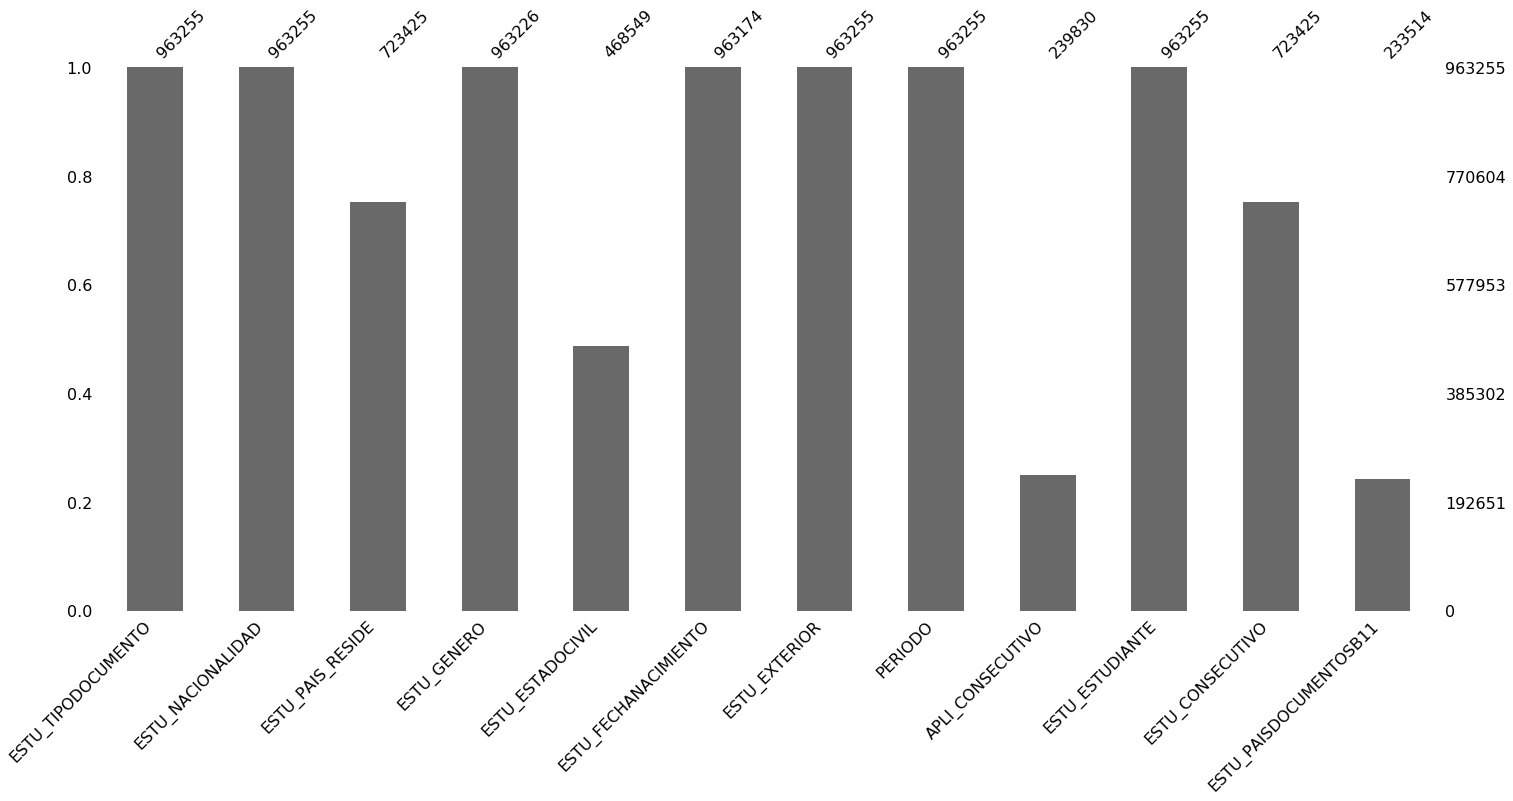

In [47]:
cols_base = ['ESTU_TIPODOCUMENTO','ESTU_NACIONALIDAD','ESTU_PAIS_RESIDE','ESTU_GENERO','ESTU_ESTADOCIVIL',
             'ESTU_FECHANACIMIENTO','ESTU_EXTERIOR','PERIODO','APLI_CONSECUTIVO','ESTU_ESTUDIANTE',
             'ESTU_CONSECUTIVO','ESTU_PAISDOCUMENTOSB11',]

for col in cols_base:
    df_clean = fix_faltante_string(df_clean,col)

msno.bar(df_clean[cols_base])

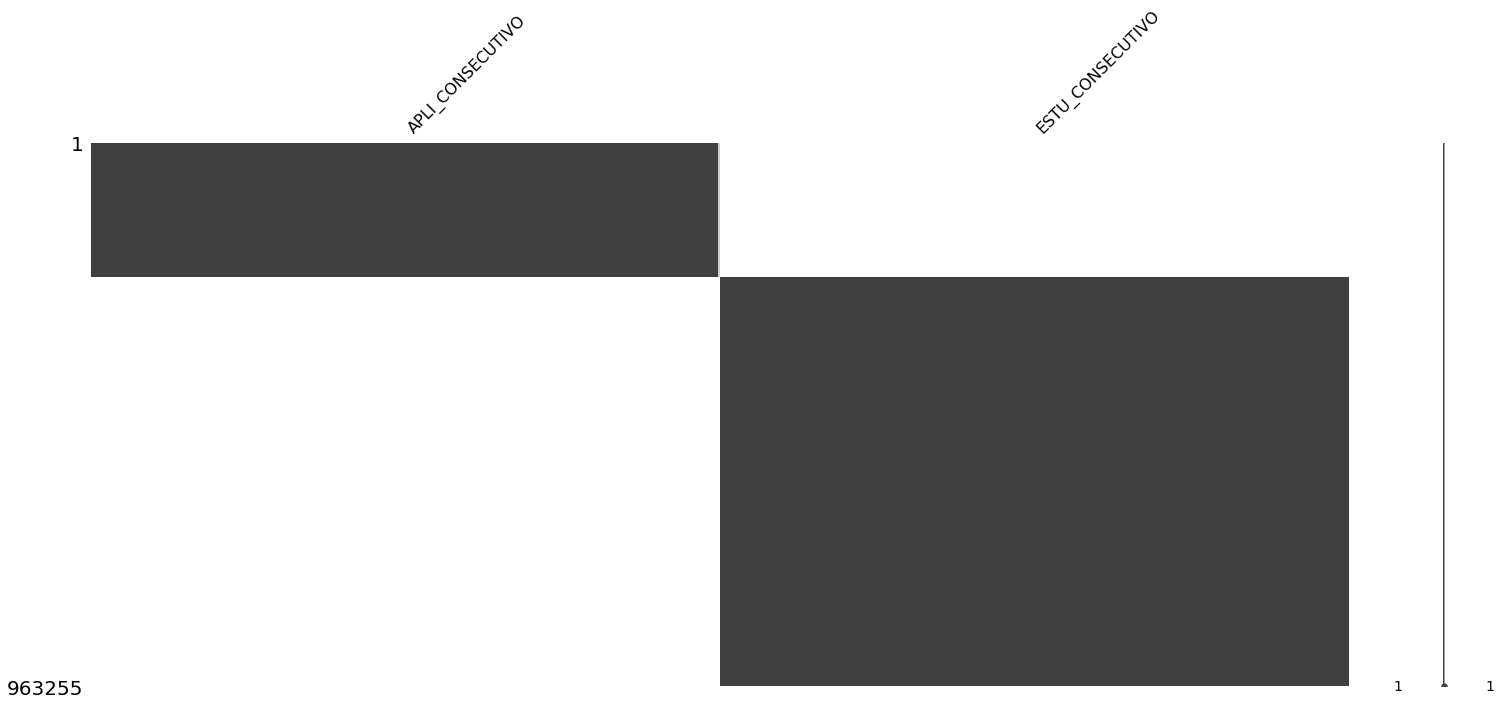

In [48]:
msno.matrix(df_clean[['APLI_CONSECUTIVO','ESTU_CONSECUTIVO']])

In [49]:
print(df_clean.loc[df_clean['APLI_CONSECUTIVO'].isnull(),'ESTU_CONSECUTIVO'].isnull().sum())
print(df_clean.loc[df_clean['ESTU_CONSECUTIVO'].isnull(),'APLI_CONSECUTIVO'].isnull().sum())

0
0


In [50]:
df_clean.loc[df_clean['ESTU_CONSECUTIVO'].isnull(),'ESTU_CONSECUTIVO'] = df_clean.loc[df_clean['ESTU_CONSECUTIVO'].isnull(),'APLI_CONSECUTIVO']
print(df_clean['ESTU_CONSECUTIVO'].isnull().sum())
df_clean['ESTU_CONSECUTIVO'].value_counts(dropna=False).head()

0


EK201630034105    1
EK201630165332    1
EK201830165089    1
EK201950338036    1
EK201950335010    1
Name: ESTU_CONSECUTIVO, dtype: int64

In [51]:
df_clean[cols_base].head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_PAIS_RESIDE,ESTU_GENERO,ESTU_ESTADOCIVIL,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,APLI_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_CONSECUTIVO,ESTU_PAISDOCUMENTOSB11
0,CC,1 COLOMBIA,NaN,F,Soltero,24/11/1994,NO,20163.0,EK201630197609,ESTUDIANTE,EK201630197609,NaN
1,CC,1 COLOMBIA,NaN,M,Soltero,11/06/1991,NO,20163.0,EK201630241417,ESTUDIANTE,EK201630241417,NaN
2,CC,1 COLOMBIA,NaN,F,Soltero,22/02/1995,NO,20163.0,EK201630080363,ESTUDIANTE,EK201630080363,NaN
3,CC,1 COLOMBIA,NaN,M,Soltero,01/08/1994,NO,20163.0,EK201630081694,ESTUDIANTE,EK201630081694,NaN
4,CC,1 COLOMBIA,NaN,M,Separado y/o Viudo,18/08/1980,NO,20163.0,EK201630079620,ESTUDIANTE,EK201630079620,NaN


In [52]:
(df_clean.loc[df_clean['ESTU_PAIS_RESIDE'].notnull(),'ESTU_PAIS_RESIDE'] == df_clean.loc[df_clean['ESTU_PAIS_RESIDE'].notnull(),'ESTU_NACIONALIDAD']).value_counts()

True    723425
dtype: int64

In [53]:
df_clean['ESTU_GENERO'].value_counts(dropna=False)

F      572448
M      390778
NaN        29
Name: ESTU_GENERO, dtype: int64

In [54]:
df_clean['ESTU_FECHANACIMIENTO'].isnull().sum()

81

In [55]:
df_clean.groupby(['YEAR','PERIODO'])['ESTU_TIPODOCUMENTO'].count()

YEAR  PERIODO
2016  20163.0    239830
2017  20173.0    233791
2018  20182.0      1141
      20183.0    228065
      20184.0       365
2019  20194.0      1802
      20195.0    258034
      20196.0       227
Name: ESTU_TIPODOCUMENTO, dtype: int64

In [56]:
for col in ['ESTU_TIPODOCUMENTO','ESTU_NACIONALIDAD','ESTU_EXTERIOR','ESTU_ESTUDIANTE']:
    print(df_clean[col].value_counts(dropna=False))
    print('---------------------------------')

CC     959048
CE       1621
CR       1403
TI        870
PE        245
PC         63
PEP         3
NES         2
Name: ESTU_TIPODOCUMENTO, dtype: int64
---------------------------------
COLOMBIA                                    721939
1 COLOMBIA                                  239323
VENEZUELA                                      508
241 VENEZUELA                                  181
ESTADOS UNIDOS                                 132
FRANCIA                                        111
ECUADOR                                         94
PERÚ                                            50
236 ESTADOS UNIDOS                              49
ALEMANIA                                        48
PANAMÁ                                          46
MÉXICO                                          44
76 FRANCIA                                      43
ESPAÑA                                          43
ITALIA                                          36
COMORAS                                         35

In [57]:
#Consecutivo de presentación del examen y del estudiante, ID solo disponible para 2016 por tanto puede ser droppado
#ESTU_ESTUDIANTE columna con un solo valor (sin información)
#ESTU_PAIS_RESIDE tiene nulos y los no nulos son iguales ESTU_NACIONALIDAD por tanto se droppa
#ESTU_PAISDOCUMENTOSB11 tiene cerca al 80% de nulos y la variable es poco informativa (variable secundaria)
df_clean.drop(['APLI_CONSECUTIVO','ESTU_ESTUDIANTE','ESTU_PAIS_RESIDE',
               'ESTU_PAISDOCUMENTOSB11'],axis=1,inplace=True)

In [58]:
#Limpiando y standarizando los nombres de los países
pattern = r"[\d]"
df_clean['ESTU_NACIONALIDAD'] = df_clean['ESTU_NACIONALIDAD'].apply(lambda x: unidecode.unidecode(re.sub(pattern,'',x)).strip())

In [59]:
#Inconsistencias: estudiantes de COLOMBIA con pasaporte o cédula extranjera
df_clean.loc[(df_clean['ESTU_TIPODOCUMENTO'].isin(['CE','PE']))&(df_clean['ESTU_NACIONALIDAD']=='COLOMBIA')].shape

(541, 109)

!ESTU_GENERO,ESTU_FECHANACIMIENTO can be imputed randomly

!ESTU_ESTADOCIVIL is an important factor but with high percentage of null values. However, it is difficult define a strategy to fill it.

## VARIABLES FAMILIA

In [60]:
df_bk = df_clean.copy()
#df_clean = df_bk.copy()

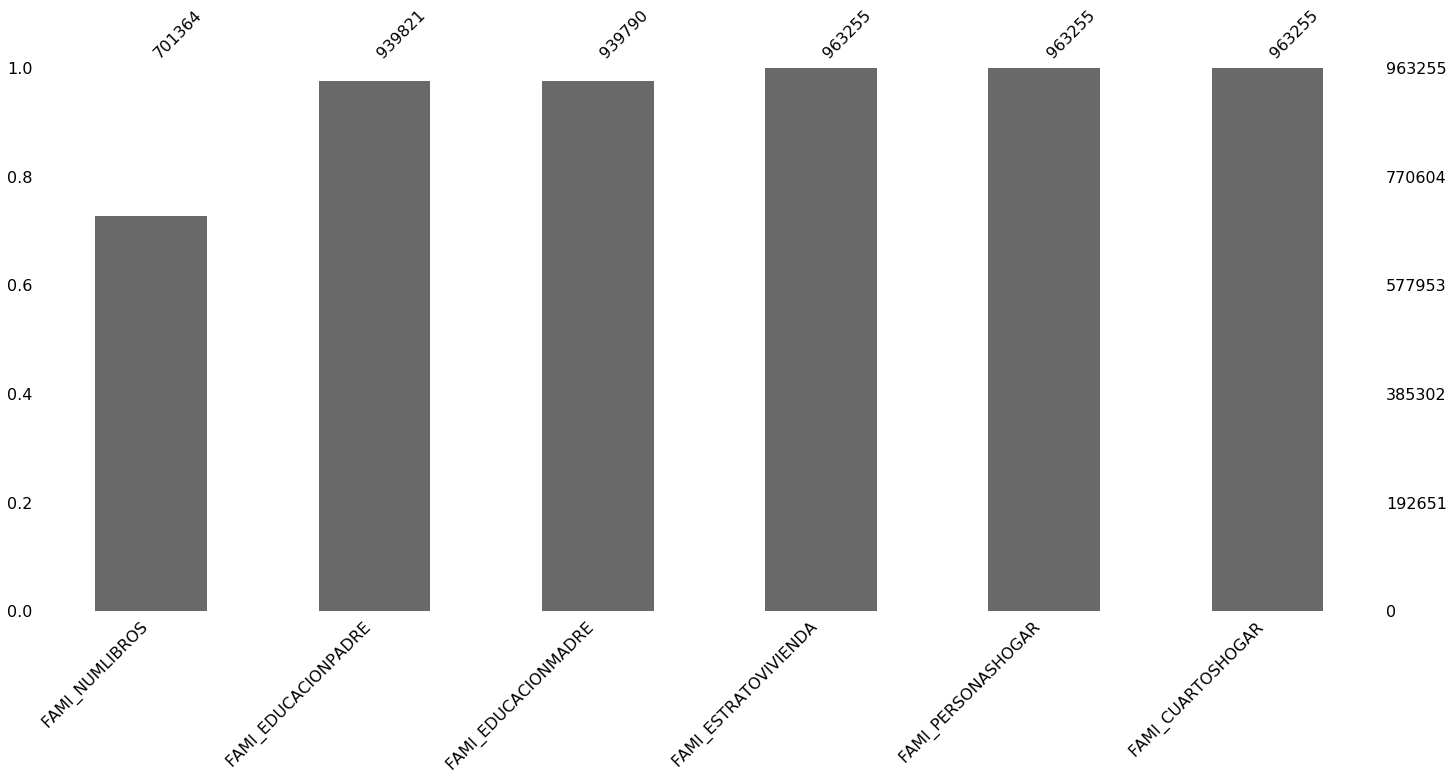

In [61]:
cols_fami = ['FAMI_NUMLIBROS','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','FAMI_ESTRATOVIVIENDA',
             'FAMI_PERSONASHOGAR','FAMI_CUARTOSHOGAR']

msno.bar(df_clean[cols_fami])

In [62]:
for col in cols_fami:
    print(df_clean[col].value_counts(dropna=False))
    print('-------------------------------------------')

NaN                  261891
0 A 10 LIBROS        214340
11 A 25 LIBROS       207447
26 A 100 LIBROS      204712
MÁS DE 100 LIBROS     74865
Name: FAMI_NUMLIBROS, dtype: int64
-------------------------------------------
Secundaria (Bachillerato) completa      191373
Primaria incompleta                     161915
Educación profesional completa          121159
Secundaria (Bachillerato) incompleta    106005
Primaria completa                        92102
Técnica o tecnológica completa           83916
Postgrado                                58757
Ninguno                                  35596
Educación profesional incompleta         33639
Técnica o tecnológica incompleta         28702
NaN                                      23434
No sabe                                  20137
No Aplica                                 6520
Name: FAMI_EDUCACIONPADRE, dtype: int64
-------------------------------------------
Secundaria (Bachillerato) completa      211859
Primaria incompleta                    

In [63]:
## FAMI_NUMLIBROS
df_clean['FAMI_NUMLIBROS'] = pd.Categorical(df_clean['FAMI_NUMLIBROS'],ordered=True,
                                            categories=['0 A 10 LIBROS','11 A 25 LIBROS',
                                                        '26 A 100 LIBROS','MÁS DE 100 LIBROS'])

## FAMI_EDUCACIONPADRE and FAMI_EDUCACIONMADRE
for col_parent in ['FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE']:
    df_clean.loc[(df_clean[col_parent]=='No Aplica') | (df_clean[col_parent]=='No sabe'),
                 col_parent] = 'No sabe/No Aplica'
    
    df_clean[col_parent] = pd.Categorical(df_clean[col_parent],ordered=True,
                      categories=['No sabe/No Aplica','Ninguno',
                                  'Primaria incompleta','Primaria completa',
                                  'Secundaria (Bachillerato) incompleta','Secundaria (Bachillerato) completa',
                                  'Técnica o tecnológica incompleta','Técnica o tecnológica completa',
                                  'Educación profesional incompleta','Educación profesional completa',
                                  'Postgrado',])

## FAMI_ESTRATOVIVIENDA
df_clean.loc[(df_clean['FAMI_ESTRATOVIVIENDA']==-1),'FAMI_ESTRATOVIVIENDA'] = np.NaN
df_clean.loc[(df_clean['FAMI_ESTRATOVIVIENDA']==-2),'FAMI_ESTRATOVIVIENDA'] = 0

df_clean['FAMI_ESTRATOVIVIENDA'] = pd.Categorical(df_clean['FAMI_ESTRATOVIVIENDA'],ordered=True,
                                                  categories=[0.0,1.0,2.0,3.0,4.0,5.0,6.0])

## FAMI_PERSONASHOGAR
df_clean.loc[(df_clean['FAMI_PERSONASHOGAR']==-1),'FAMI_PERSONASHOGAR'] = np.NaN

## FAMI_CUARTOSHOGAR
df_clean.loc[(df_clean['FAMI_CUARTOSHOGAR']==-1),'FAMI_CUARTOSHOGAR'] = np.NaN

In [64]:
for col in cols_fami:
    print(df_clean[col].value_counts(dropna=False))
    print('-------------------------------------------')

NaN                  261891
0 A 10 LIBROS        214340
11 A 25 LIBROS       207447
26 A 100 LIBROS      204712
MÁS DE 100 LIBROS     74865
Name: FAMI_NUMLIBROS, dtype: int64
-------------------------------------------
Secundaria (Bachillerato) completa      191373
Primaria incompleta                     161915
Educación profesional completa          121159
Secundaria (Bachillerato) incompleta    106005
Primaria completa                        92102
Técnica o tecnológica completa           83916
Postgrado                                58757
Ninguno                                  35596
Educación profesional incompleta         33639
Técnica o tecnológica incompleta         28702
No sabe/No Aplica                        26657
NaN                                      23434
Name: FAMI_EDUCACIONPADRE, dtype: int64
-------------------------------------------
Secundaria (Bachillerato) completa      211859
Primaria incompleta                     132118
Educación profesional completa         

## YEAR NORMALIZATION

In [65]:
df_bk = df_clean.copy()
#df_clean = df_bk.copy()

In [66]:
df_clean['len_fecha'] = df_clean['ESTU_FECHANACIMIENTO'].str.len()
df_clean['len_fecha'].value_counts(dropna=False)

10.0    703122
22.0    260052
NaN         81
Name: len_fecha, dtype: int64

In [67]:
df_clean.loc[df_clean['ESTU_FECHANACIMIENTO'].isnull(),'YEAR'].value_counts(dropna=False)

2018    49
2016    12
2019    11
2017     9
Name: YEAR, dtype: int64

In [68]:
df_clean.loc[df_clean['len_fecha']==22,'ESTU_FECHANACIMIENTO'].str.split('/').apply(lambda x: x[0]).unique()

array(['06', '02', '12', '08', '09', '11', '01', '05', '07', '10', '03',
       '04'], dtype=object)

In [69]:
for year_pres in [2016, 2017, 2018, 2019]:
    print('------------------------------------- {} -------------------------------------'.format(year_pres))
    print(df_clean.loc[(df_clean['len_fecha']==10) & (df_clean['YEAR']==year_pres),
                       'ESTU_FECHANACIMIENTO'].str.split('/').apply(lambda x: x[1]).unique())

------------------------------------- 2016 -------------------------------------
['11' '06' '02' '08' '03' '07' '10' '05' '09' '01' '12' '04']
------------------------------------- 2017 -------------------------------------
['07' '12' '02' '10' '01' '04' '09' '06' '11' '03' '05' '08']
------------------------------------- 2018 -------------------------------------
['28' '31' '17' '27' '21' '04' '02' '22' '20' '24' '01' '10' '09' '30'
 '08' '06' '29' '26' '11' '07' '23' '03' '05' '12' '16' '14' '25' '19'
 '18' '13' '15']
------------------------------------- 2019 -------------------------------------
[]


In [70]:
df_clean.loc[(df_clean['len_fecha']==10) & (df_clean['YEAR']==2018),
             'ESTU_FECHANACIMIENTO'].str.split('/').apply(lambda x: x[0]).unique()

array(['05', '07', '01', '10', '08', '04', '02', '09', '06', '11', '12',
       '03'], dtype=object)

In [71]:
df_clean.loc[(df_clean['len_fecha']==10),'YEAR'].unique()

array([2016, 2017, 2018])

ESTU_FECHANACIMIENTO has three formats:
* len_fecha = 10:
    * 'YEAR'==2018: mm/dd/yyyy
    * 'YEAR'.isin([2016,2017]): dd/mm/yyyy
* len_fecha = 22: mm/dd/yy HH:MM:SS pp ('YEAR'==2019)

In [72]:
df_clean['ESTU_FECHANACIMIENTO_ASSERT'] = np.NaN

filter_data = ((df_clean['YEAR']==2016)|(df_clean['YEAR']==2017))&(df_clean['ESTU_FECHANACIMIENTO'].notnull())
df_clean.loc[filter_data,'ESTU_FECHANACIMIENTO_ASSERT'] = df_clean.loc[filter_data,'ESTU_FECHANACIMIENTO'].str.split('/').apply(lambda x: '{}/{}/{}'.format(x[1],x[0],x[2]))

filter_data = (df_clean['YEAR']==2019)&(df_clean['ESTU_FECHANACIMIENTO'].notnull())
df_clean.loc[filter_data,'ESTU_FECHANACIMIENTO_ASSERT'] = df_clean.loc[filter_data,'ESTU_FECHANACIMIENTO'].str[:10]

filter_data = (df_clean['YEAR']==2018)&(df_clean['ESTU_FECHANACIMIENTO'].notnull())
df_clean.loc[filter_data,'ESTU_FECHANACIMIENTO_ASSERT'] = df_clean.loc[filter_data,'ESTU_FECHANACIMIENTO']

In [73]:
#pd.to_datetime(df_clean.loc[df_clean['ESTU_FECHANACIMIENTO'].notnull(),'ESTU_FECHANACIMIENTO'],format='%m/%d/%Y')#, errors='coerce'
df_clean['years'] = df_clean.loc[df_clean['ESTU_FECHANACIMIENTO_ASSERT'].notnull(),'ESTU_FECHANACIMIENTO_ASSERT'].str.split('/').apply(lambda x: int(x[2]))
df_clean['years'].describe()

count    963174.000000
mean       1991.099093
std           9.212314
min          12.000000
25%        1989.000000
50%        1993.000000
75%        1995.000000
max        2019.000000
Name: years, dtype: float64

In [74]:
df_clean.loc[df_clean['years']<1950,'years'].value_counts()

1900.0    595
1940.0     39
1949.0     24
1948.0     19
1947.0     15
1946.0     14
1945.0     11
1916.0      8
1944.0      5
1896.0      5
1886.0      5
1933.0      4
1895.0      4
1889.0      4
1942.0      3
1887.0      3
1943.0      3
1881.0      3
1941.0      2
1919.0      2
1894.0      2
1879.0      2
1902.0      2
1196.0      2
1888.0      2
1876.0      2
1074.0      1
82.0        1
12.0        1
1003.0      1
94.0        1
20.0        1
1871.0      1
1929.0      1
1904.0      1
96.0        1
73.0        1
81.0        1
17.0        1
1197.0      1
1882.0      1
1905.0      1
1195.0      1
1918.0      1
1909.0      1
1885.0      1
1907.0      1
1906.0      1
1931.0      1
1884.0      1
1192.0      1
1928.0      1
1666.0      1
1878.0      1
1897.0      1
1883.0      1
1935.0      1
Name: years, dtype: int64

In [75]:
df_clean.loc[df_clean['years']>2005,'years'].value_counts()

2018.0    70
2016.0    66
2019.0    64
2015.0    24
2017.0    11
2014.0     4
2012.0     3
2007.0     2
2011.0     2
2010.0     2
2006.0     1
2013.0     1
Name: years, dtype: int64

In [76]:
random.seed(4)
normal_years = np.random.normal(1993, 3, 100).astype(int)
filter_year = (df_clean['years']>2005) | (df_clean['years']<1950)

#df_clean.loc[filter_year,'ESTU_FECHANACIMIENTO_ASSERT'] = df_clean.loc[filter_year,'ESTU_FECHANACIMIENTO_ASSERT'].apply(lambda x: if x)
df_clean.loc[filter_year,'ESTU_FECHANACIMIENTO_ASSERT'] = df_clean.loc[filter_year,'ESTU_FECHANACIMIENTO_ASSERT'].str.split('/').apply(lambda x: '{}/{}/{}'.format(x[0],x[1],random.choice(normal_years)))

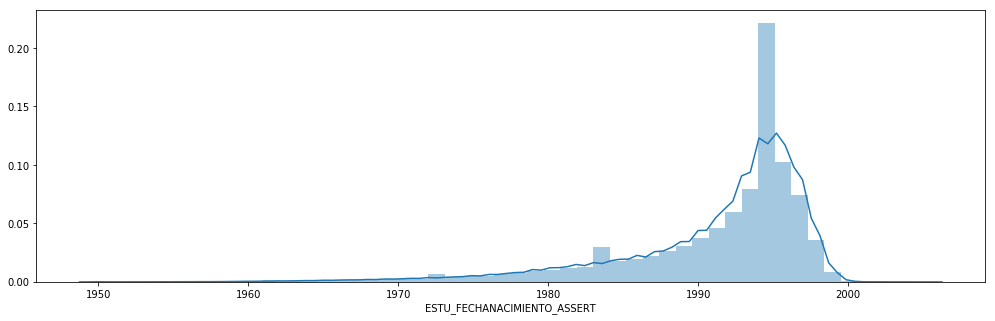

In [77]:
fig, axes = plt.subplots(figsize=(17, 5))
sns.distplot(pd.to_datetime(df_clean['ESTU_FECHANACIMIENTO_ASSERT'].fillna('06/11/1950'),format='%m/%d/%Y').dt.year,)
plt.show()

In [78]:
#Dropping auxiliar columns
df_clean.drop(['len_fecha','years'],axis=1,inplace=True)

## DEPARTAMENTO RESIDE/PROGRAMA

In [79]:
for col in ['ESTU_DEPTO_RESIDE','ESTU_PRGM_DEPARTAMENTO']:
    df_clean[col]=df_clean[col].str.replace(u"Á", "A")
    df_clean[col]=df_clean[col].str.replace(u",", "")

## VARIABLE RESPUESTA

In [80]:
df_clean[['PUNT_GLOBAL','PERCENTIL_GLOBAL','percentile']].isnull().sum()

PUNT_GLOBAL         0
PERCENTIL_GLOBAL    9
percentile          0
dtype: int64

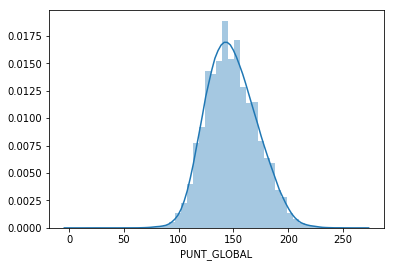

In [81]:
sns.distplot(df_clean['PUNT_GLOBAL'])

## RESUMEN

In [82]:
df_clean.shape

(963255, 110)

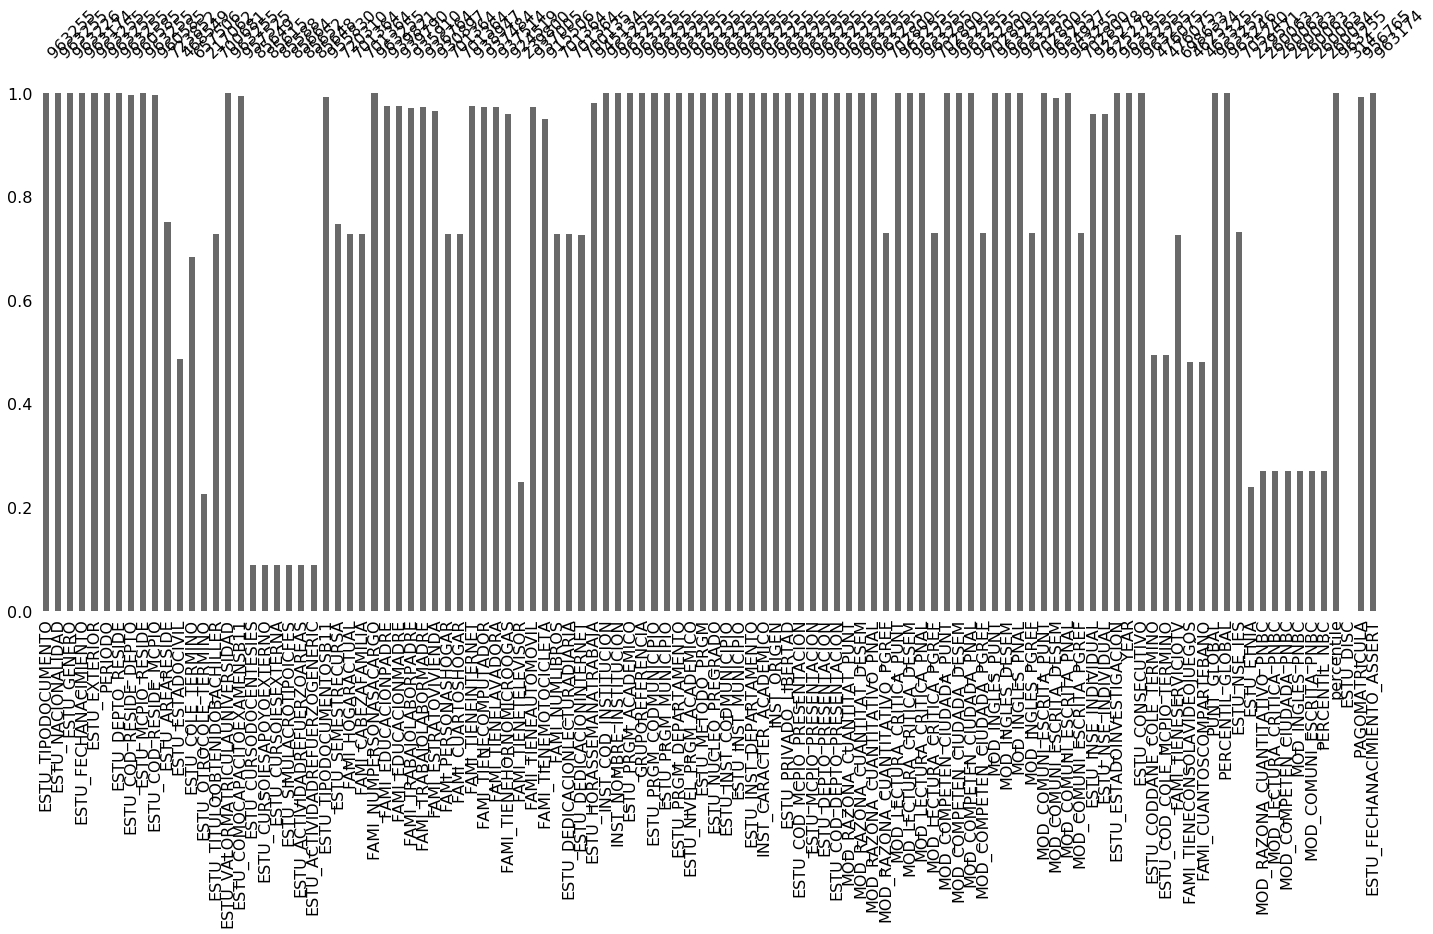

In [83]:
msno.bar(df_clean)

In [84]:
df_clean.to_csv('./saberpro_2016-2019_cleaned_v3.csv',sep=';',index=False)

## Conclusions

* ESTU_DISC can be dropped due to its high null percentage.
* ESTU_ETNIA only available for 2018.
* ESTU_NSE_IES has no values for 2016.
* ESTU_AREARESIDE has 30% of null values. It can be imputed in a stratified basis.
* COD_DEPTO, DEPTO, COD_MCPIO, MCPIO need to be verified with dictionary.
* ESTU_SEMESTRECURSA has 20% of null values
* PAGOMATRICULA has 0.7% of null values
* High school variables can be filled from high school, codes and title
* ESTU_COMOCAPACITOEXAMENSB11 can be dropped due to its relation with the target variable is complex and indirect. Also it has a plenty of null values.
* ESTU_CURSODOCENTESIES,ESTU_CURSOIESAPOYOEXTERNO,ESTU_CURSOIESEXTERNA, ESTU_SIMULACROTIPOICFES,ESTU_ACTIVIDADREFUERZOAREAS,ESTU_ACTIVIDADREFUERZOGENERIC are related with the preparation course. However, its null percentage is high.
* Gender and birth date have low percentage null and can be imputed randomly
* Civil nature is an important factor but with high percentage of null values. However, it is difficult define a strategy to fill it.